<a href="https://colab.research.google.com/github/dqminhv/Capstone_Project_2/blob/main/Fake_Job_Postings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Importing Data and Cleaning

## **1. Import required packages**

In [1]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e6ad747ddff3b8ab08602a6c5a7546faaed64044c872c1001b3ef1ad8b2e0ef1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.

In [2]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [3]:
#import required packages
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus
import missingno as msno
from ydata_profiling import ProfileReport

##2. Load data

In [4]:
#Load csv file to a pandas DataFrame
job_postings_data = pd.read_csv('https://raw.githubusercontent.com/dqminhv/Capstone_Project_2/main/Data/fake_job_postings.csv')

In [5]:
#Let look at the first few row of th data frame
job_postings_data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [6]:
#Delete the job_id column since it has no use
job_postings_data.drop('job_id', axis=1, inplace=True)

##3. Explore the data set

###a. Use ydata-profiling to explore the data set.

In [7]:
profile = ProfileReport(job_postings_data, title="Pandas Profiling Report")

In [8]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Let look at the data type of each column and see if how many missing values there are
job_postings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

**It seems that the data set has many missing values. We will figure out how to address those missing values.**



###b. Dealing with missing values

<Axes: >

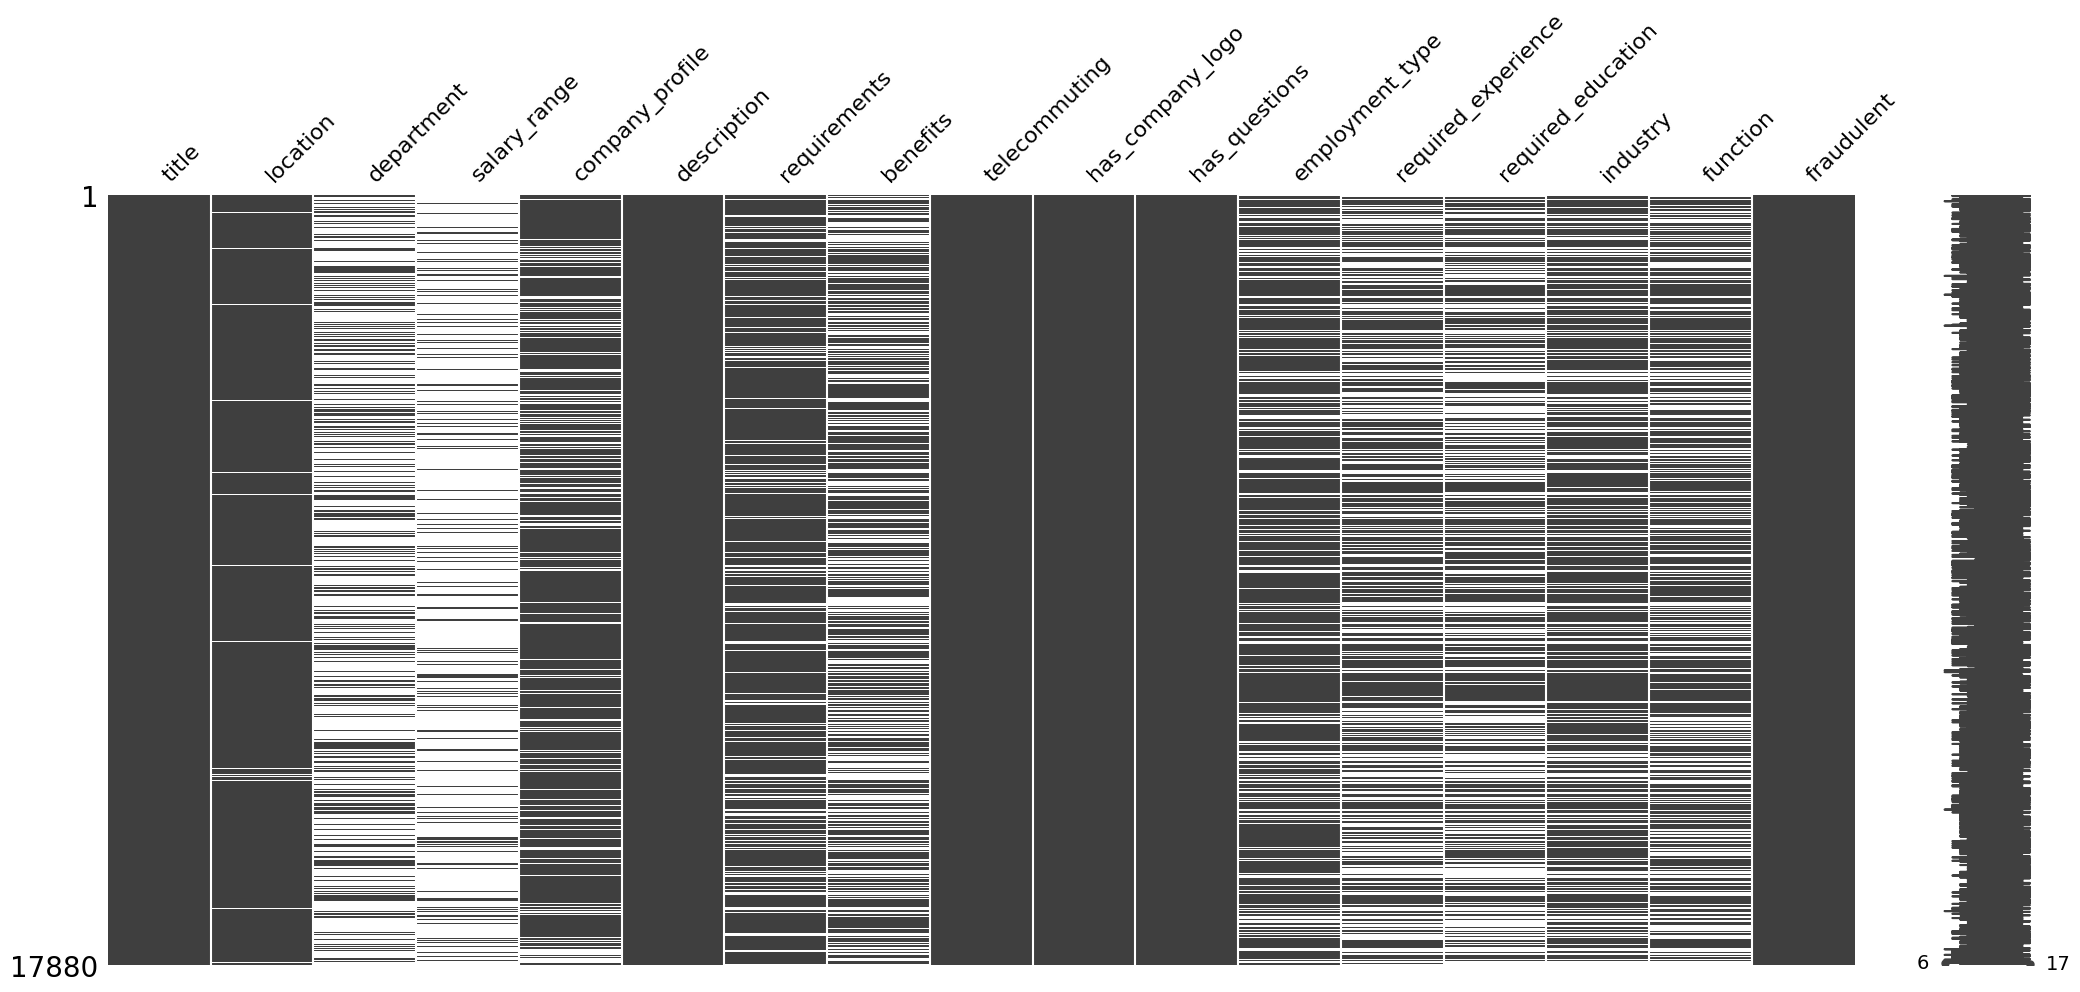

In [10]:
#Let plot a missing values matrix
msno.matrix(job_postings_data)

**It seems that there are many variables with high missing-value rates. Intuitively, we should not simply drop these variables since the missing value could be an indicator of fraudulent job postings. We can make some count plots to see whether we can see any relationship between missing value and fraudulent postings.**

In [11]:
#Let create a list of variables that have missing values
missing_value_var = job_postings_data.columns.drop(['title', 'description', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent' ])

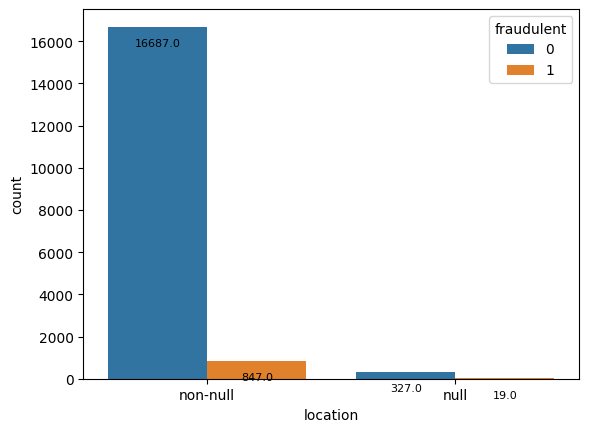

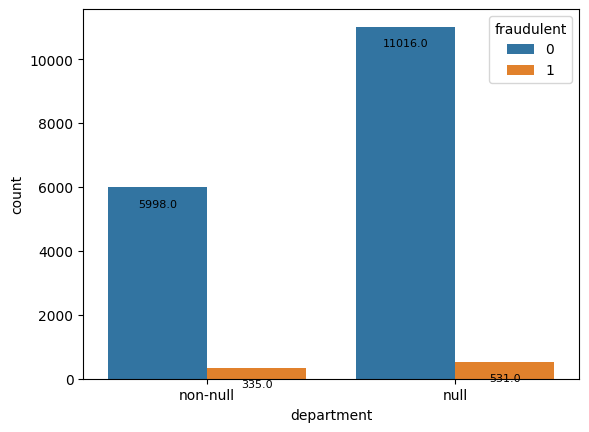

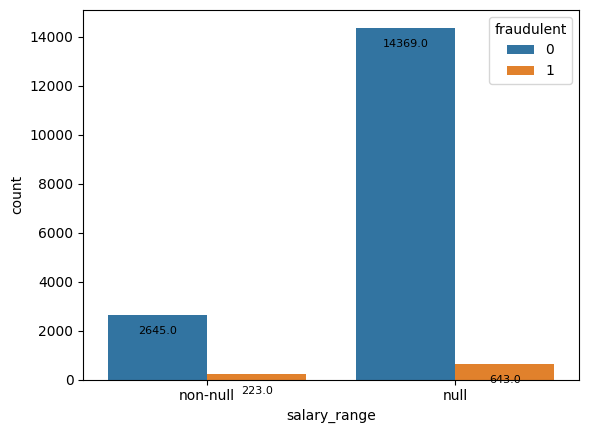

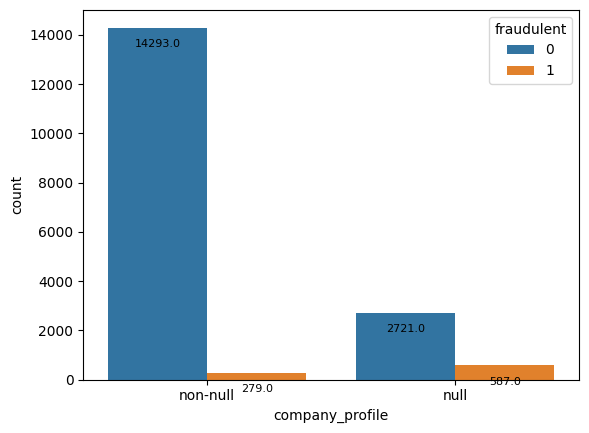

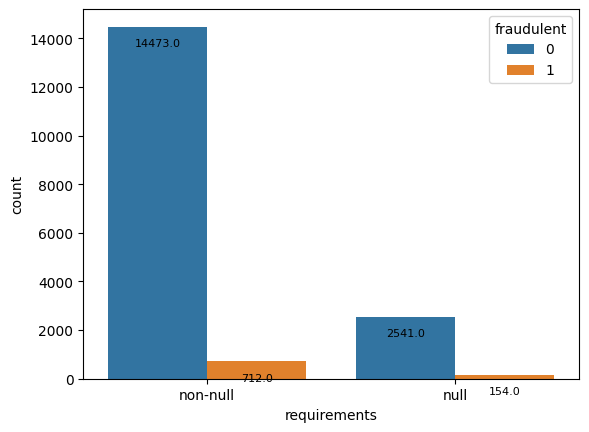

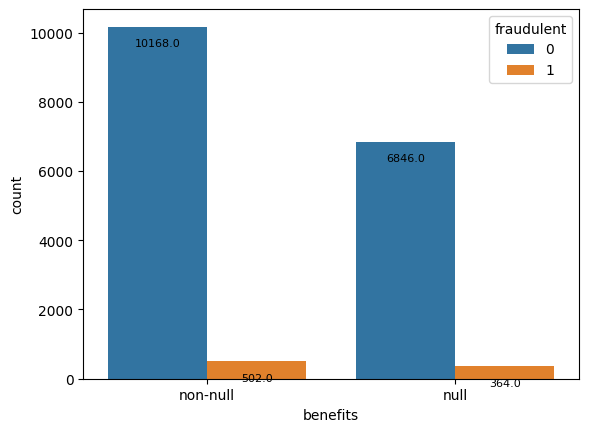

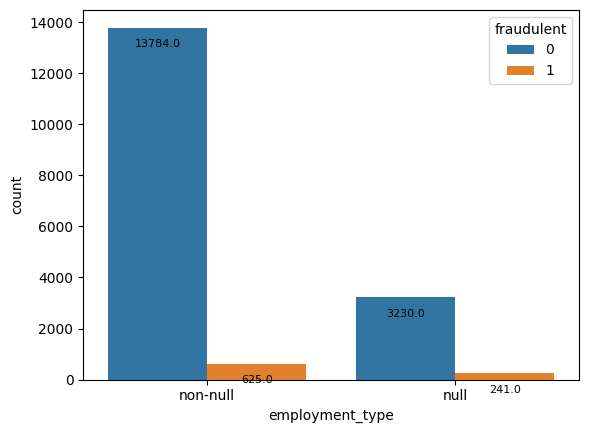

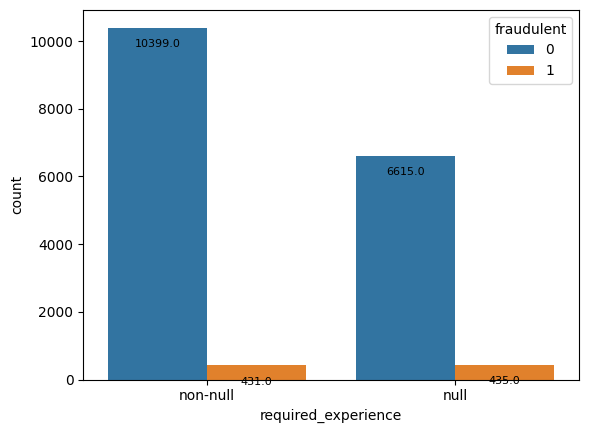

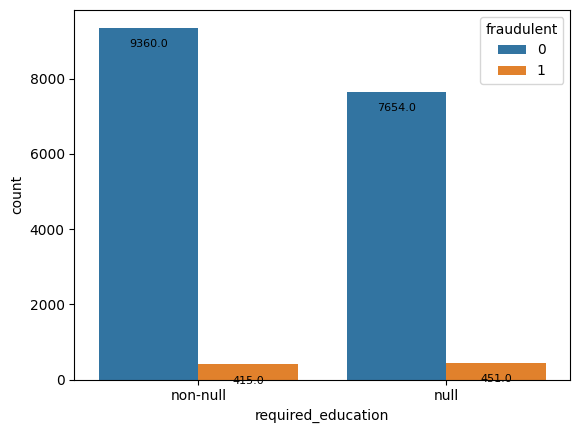

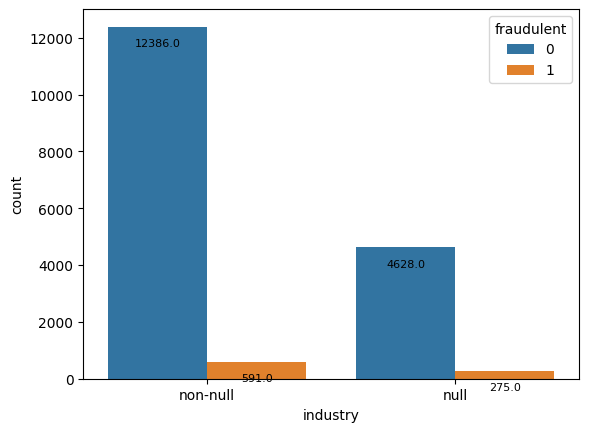

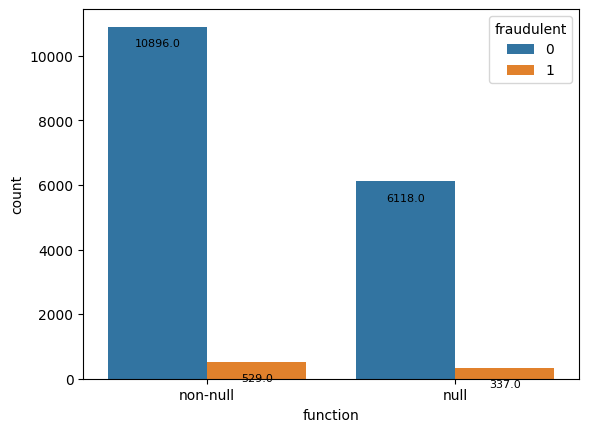

In [12]:
#We create a 2-column sub-dataframe for each variable with missing values, which contains that variable and the fraudulent column. For each record of each variable, we simply transform its content to null or non-null.
#We then make a count plot for the number of real/fraudulent job postings for each null/non-null category
for var in missing_value_var:
  df = job_postings_data[[var, 'fraudulent']]
  df.loc[~df[var].isnull(), var] = 'non-null'
  df[var].fillna('null', inplace=True)
  _ = sns.countplot(x=var, data=df ,hue="fraudulent", order=['non-null', 'null'])
  for p in _.patches:
    _.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)
  plt.show()

**From the plots above, it is difficult to conclude whether missing value is a sign of fraudulent job postings. We will keep those missing values and impute them with appropriate values. We see that all integer variables, 'telecommuting', 'has_company_logo', 'has_questions', and the predict variable, 'fraudulent', do not contain missing values. Thus, we will impute missing values for other variable with 'non-specified'.**

In [13]:
job_postings_data.fillna('Not Specified', inplace=True)

In [14]:
#Let check if there is any missing values
job_postings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

###c. Wragling data

In [15]:
#Let explore unique values for each variable. We should drop 'company_profile',	'description',	'requirements',	'benefits' variables because these variables will most likely have a distinct value for each record.
for col in job_postings_data.drop(['company_profile',	'description',	'requirements',	'benefits'], axis=1).columns:
  print(job_postings_data.value_counts(col).sort_index())
  print('\n')
  print('***************************')

title
   Electrician                                                       1
   Environmental Technician I                                        1
   Piping Material Engineer                                          1
  Discipline Manager Civil, Structural, Marine, Architectural        1
  FEA Senior engineer                                                1
                                                                    ..
warehouse opperative                                                 1
web designer                                                         1
web project manager                                                  1
work from home                                                       1
~ LM Structures - Expression of Interest for Future Consideration    1
Length: 11231, dtype: int64


***************************
location
AE, ,                       6
AE, , Abudhabi              1
AE, , Dubai                 6
AE, , Media City | Dubai    3
AE, AZ,                   

**From the value count summary, we see that there are some values of some variables that can be classified as 'Not Specified', like 'Other', 'Not Applicable', 'Unspecified'. We should also trim the leading and trailing white spaces for variables of type string.**

In [16]:
for col in job_postings_data.drop(['company_profile',	'description',	'requirements',	'benefits'], axis=1).columns:
  job_postings_data[col] = job_postings_data[col].replace(['Not Applicable','Unspecified'],'Not Specified')
  if job_postings_data[col].dtype == 'object':
    job_postings_data[col] = job_postings_data[col].str.strip()
  print(job_postings_data.value_counts(col).sort_index())
  print('\n')
  print('***************************')

title
$950/Week Truck Drivers Needed                                       1
$950/week. Truck Drivers Needed                                      1
(Assistant) Accountant                                               1
(Internship) Communication / E-Marketing Assistant                   1
(Internship) PR / Event Manager Assistant                            1
                                                                    ..
warehouse opperative                                                 1
web designer                                                         1
web project manager                                                  1
work from home                                                       1
~ LM Structures - Expression of Interest for Future Consideration    1
Length: 10915, dtype: int64


***************************
location
AE, ,                       6
AE, , Abudhabi              1
AE, , Dubai                 6
AE, , Media City | Dubai    3
AE, AZ,                   

**Let look at the location of the job postings data to see which country that job postings belong to.**

In [17]:
#Create a split function to get the country code of the location variable
def get_country(location):
    l = location.split(',')
    return l[0]

In [18]:
#Create a new column 'country_code' by spliting the location variable
job_postings_data['country_code'] = job_postings_data['location'].apply(get_country)

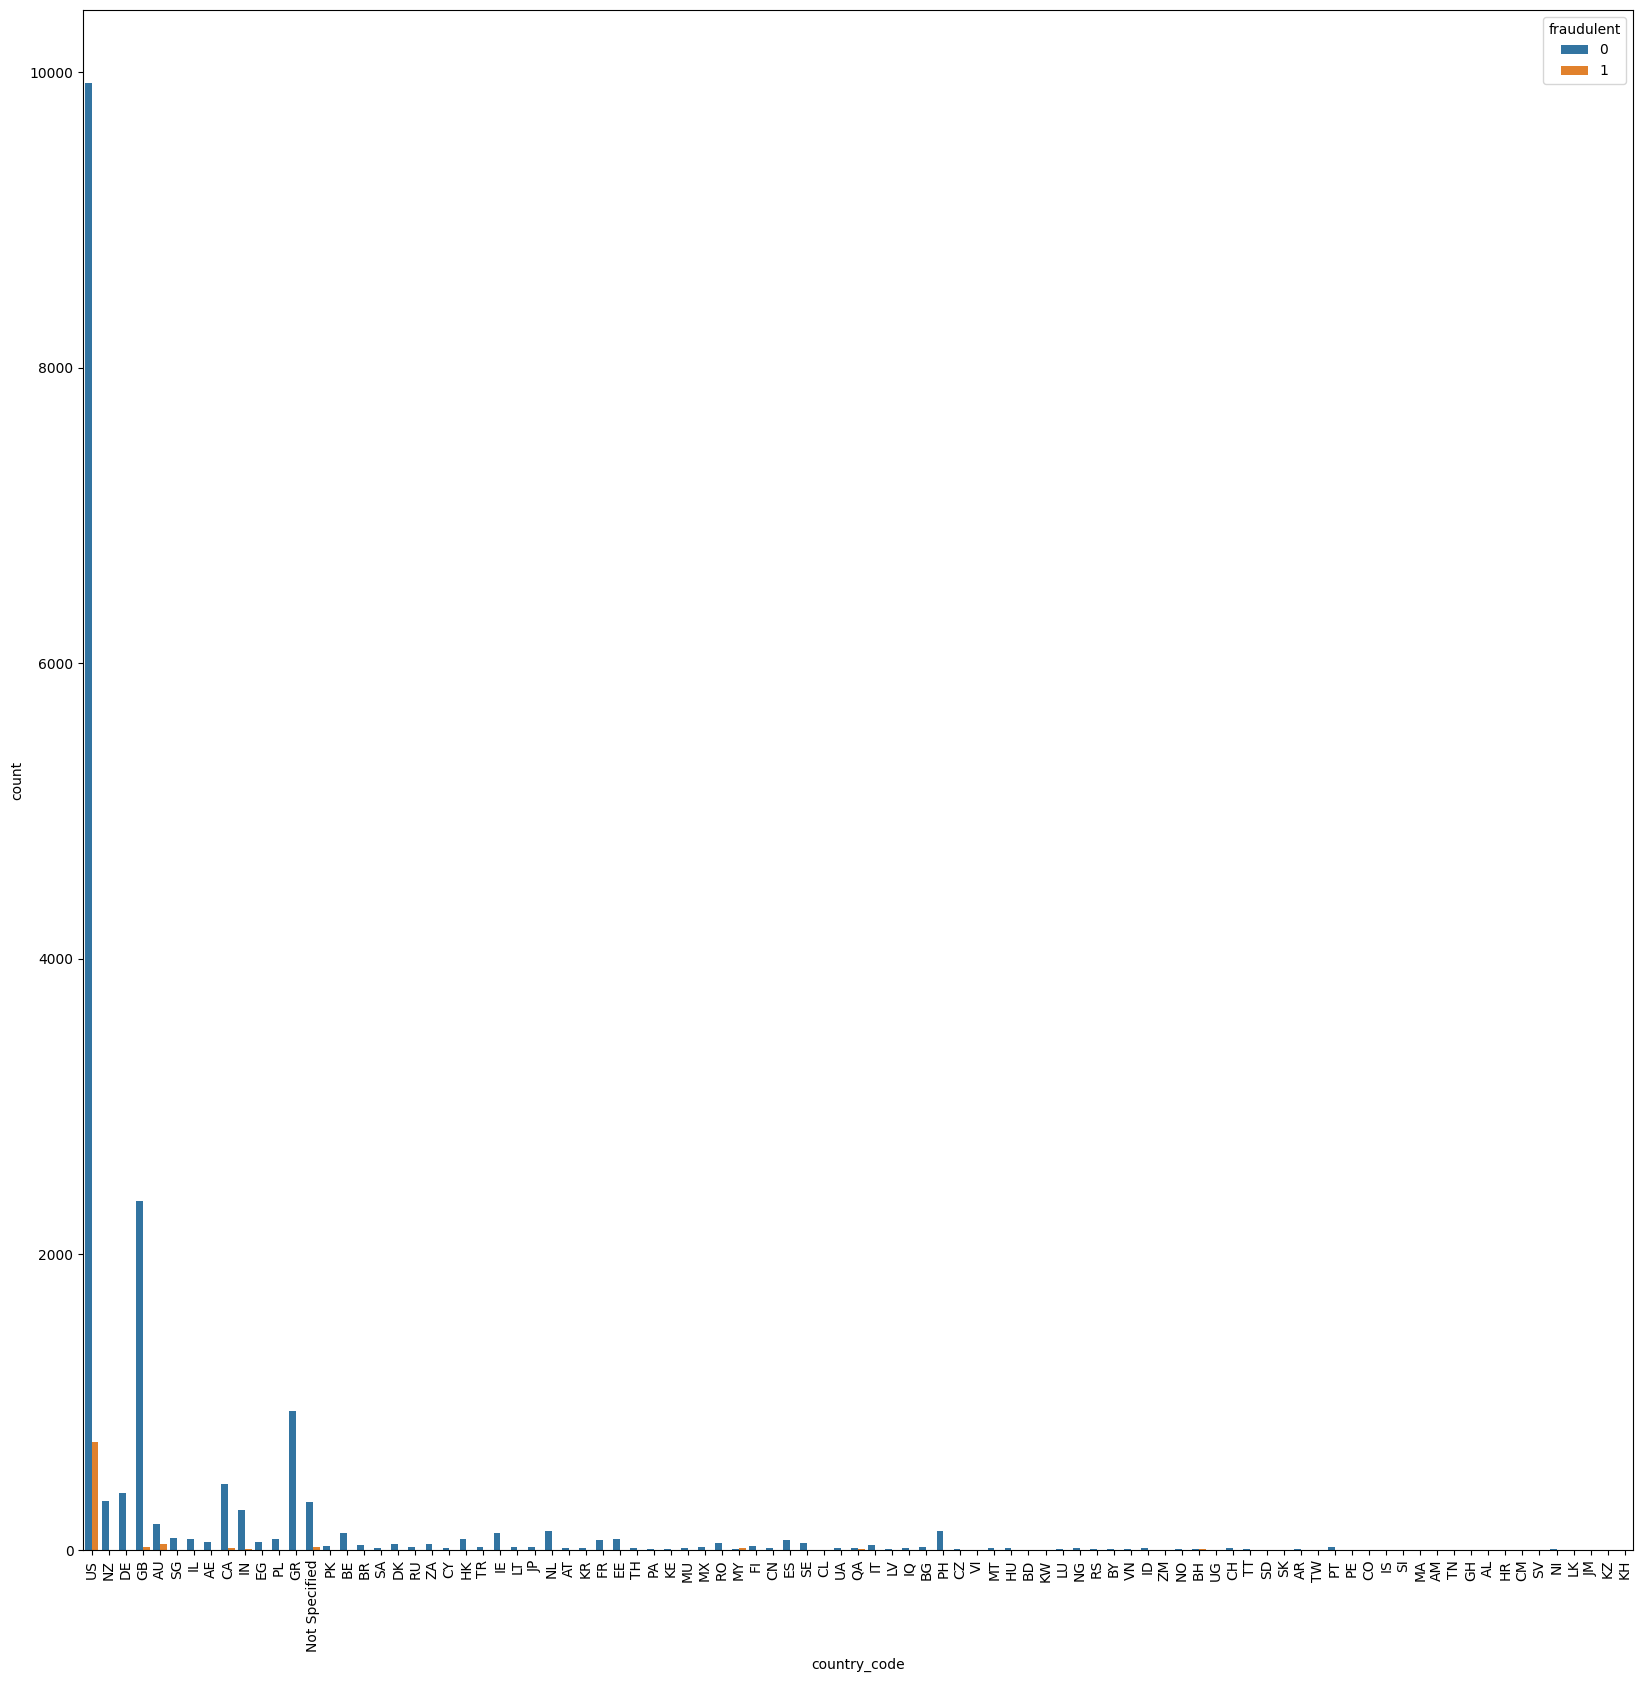

In [19]:
#Let make a count plot for each country
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_yscale('log')
_ = sns.countplot(x='country_code', data=job_postings_data, hue='fraudulent', ax=ax)
plt.xticks(rotation = 90, size=10)
plt.show()

It seems that most job postings and most fraudulent postings in this data set are in the United States. The number of job postings and fraudulent postings for other countries are insignificant with respect to those in the US. Thus, we will focus our model on job postings in the US. We will retain data for job postings in the US only.

In [20]:
#Create a data set that contain only job postings in the United States
job_postings_data_US = job_postings_data[job_postings_data['country_code']=='US']

In [21]:
#We can drop the country_code column since it has no use from now
job_postings_data_US = job_postings_data_US.drop('country_code', axis=1)
job_postings_data_US.reset_index(drop=True, inplace=True)

In [22]:
job_postings_data_US.head()

title            location     department  \
0                         Marketing Intern    US, NY, New York      Marketing   
1  Commissioning Machinery Assistant (CMA)       US, IA, Wever  Not Specified   
2        Account Executive - Washington DC  US, DC, Washington          Sales   
3                      Bill Review Manager  US, FL, Fort Worth  Not Specified   
4                         Accounting Clerk             US, MD,  Not Specified   

    salary_range                                    company_profile  \
0  Not Specified  We're Food52, and we've created a groundbreaki...   
1  Not Specified  Valor Services provides Workforce Solutions th...   
2  Not Specified  Our passion for improving quality of life thro...   
3  Not Specified  SpotSource Solutions LLC is a Global Human Cap...   
4  Not Specified                                      Not Specified   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Our client, located in Houston, is actively se...   
2  THE COMPANY: ESRI – Environmental Systems Rese...   
3  JOB TITLE: Itemization Review ManagerLOCATION:...   
4  Job OverviewApex is an environmental consultin...   

                                        requirements  \
0  Experience with content management systems a m...   
1  Implement pre-commissioning and commissioning ...   
2  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
3  QUALIFICATIONS:RN license in the State of Texa...   
4                                      Not Specified   

                                            benefits  telecommuting  \
0                                      Not Specified              0   
1                                      Not Specified              0   
2  Our culture is anything but corporate—we have ...              0   
3                              Full Benefits Offered              0   
4                                      Not Specified              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0   Not Specified       Not Specified   
2                 1              0       Full-time    Mid-Senior level   
3                 1              1       Full-time    Mid-Senior level   
4                 0              0   Not Specified       Not Specified   

  required_education                industry              function  fraudulent  
0      Not Specified           Not Specified             Marketing           0  
1      Not Specified           Not Specified         Not Specified           0  
2  Bachelor's Degree       Computer Software                 Sales           0  
3  Bachelor's Degree  Hospital & Health Care  Health Care Provider           0  
4      Not Specified           Not Specified         Not Specified           0

In [23]:
job_postings_data_US.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

# II. EDA

Let's examine the distribution of the response variable (fraudulent column). We make a count plot for the two types of job postings and calculate the percentage of each category.

Certainly, conducting Exploratory Data Analysis (EDA) is a crucial initial step before building any predictive model. Here's a guideline for performing EDA on your job postings dataset to better understand the data and prepare it for building a model to predict fraudulent job postings:

1. **Understand the Dataset**:
   - Load the dataset and get a basic overview of its structure and content using functions like `head()`, `info()`, `describe()`, and `shape`.

2. **Handle Missing Values**:
   - Identify columns with missing values using `isnull()` or `info()` and decide how to handle them (remove, impute, or leave as-is).
   - Visualize missing value patterns using techniques like a heatmap.

3. **Explore Target Variable**:
   - Examine the distribution of the target variable ('fraudulent') to understand the class imbalance. Plot a count plot to see the balance between fraudulent and non-fraudulent postings.

4. **Explore Numerical Features**:
   - Analyze numerical features like 'telecommuting', 'has_company_logo', 'has_questions', etc. with summary statistics and visualizations (histograms, bar plots, etc.).
   - Compare the distributions of these features for fraudulent and non-fraudulent postings.

5. **Explore Categorical Features**:
   - Analyze categorical features like 'employment_type', 'required_experience', 'industry', etc.
   - Use count plots or bar plots to visualize the distribution of categories within each feature and compare them for both classes.

6. **Text Data Analysis**:
   - Analyze text-based columns like 'title', 'company_profile', 'description', etc.
   - Check for common words/phrases in fraudulent and non-fraudulent postings using word clouds or word frequency plots.
   - Consider creating features from text data, like word count or TF-IDF scores.

7. **Feature Relationships**:
   - Explore potential relationships between features and the target variable using pivot tables, groupby, or visualizations.
   - For example, analyze if specific departments or industries have a higher proportion of fraudulent postings.

8. **Correlation Analysis**:
   - Calculate correlations between numerical features using methods like Pearson correlation.
   - Use a correlation heatmap to visualize correlations and identify potential multicollinearity.

9. **Outlier Detection**:
   - Check for outliers in numerical features that might affect the model's performance.
   - Visualize outliers using box plots or scatter plots.

10. **Feature Engineering**:
    - Consider creating new features that might provide additional insights or improve predictive power.
    - Example: Combine 'required_experience' and 'required_education' into a single feature indicating the qualifications needed.

11. **Data Visualization**:
    - Create visualizations to illustrate your findings and insights, using libraries like `matplotlib` and `seaborn`.

12. **Summary and Next Steps**:
    - Summarize the key findings from your EDA.
    - Identify potential challenges, data quality issues, and areas that might need further investigation.
    - Plan for data preprocessing steps and feature engineering based on your insights.

Remember, EDA is an iterative process. As you proceed with building your predictive model, you might need to revisit the EDA step to refine your understanding of the data and make necessary adjustments.

##1. Explore Target Variable:

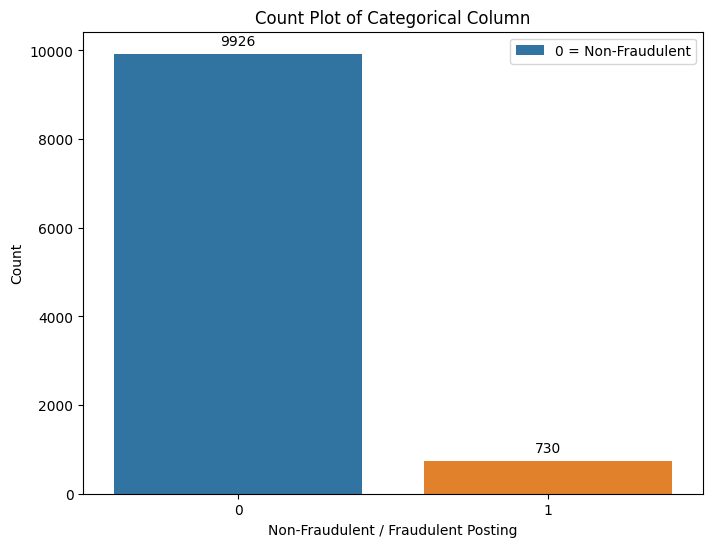

Percentage of fraudulent job postings: 6.85
Percentage of non-fraudulent job postings: 93.15


In [24]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraudulent', data=job_postings_data_US)

# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title("Count Plot of Categorical Column")
plt.xlabel("Non-Fraudulent / Fraudulent Posting")
plt.ylabel("Count")
plt.legend(labels=['0 = Non-Fraudulent', '1 = Fraudulent'])
plt.show()
fraud_counts = job_postings_data_US['fraudulent'].value_counts()
print('Percentage of fraudulent job postings: {:.2f}'.format( fraud_counts[1]/ len(job_postings_data_US['fraudulent'])*100))
print('Percentage of non-fraudulent job postings: {:.2f}'.format( fraud_counts[0]/ len(job_postings_data_US['fraudulent'])*100))

The data is very imbalanced. We'll keep this in mind when building and assessing the predictive model in the next step.

In [25]:
job_postings_data_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                10656 non-null  object
 1   location             10656 non-null  object
 2   department           10656 non-null  object
 3   salary_range         10656 non-null  object
 4   company_profile      10656 non-null  object
 5   description          10656 non-null  object
 6   requirements         10656 non-null  object
 7   benefits             10656 non-null  object
 8   telecommuting        10656 non-null  int64 
 9   has_company_logo     10656 non-null  int64 
 10  has_questions        10656 non-null  int64 
 11  employment_type      10656 non-null  object
 12  required_experience  10656 non-null  object
 13  required_education   10656 non-null  object
 14  industry             10656 non-null  object
 15  function             10656 non-null  object
 16  frau

##2. Exploring Features

The data set includes numerical features and categorical features. We will explore these two type of features. For each feature, we will examine its relationship with the response variable.

In [26]:
#Let's split the features into two types

#Numerical features
num_fea = ['telecommuting', 'has_company_logo', 'has_questions']

#Categorical features
cat_fea = (job_postings_data_US.columns.drop(num_fea)).drop('fraudulent')

###a. Exploring Numerical Features

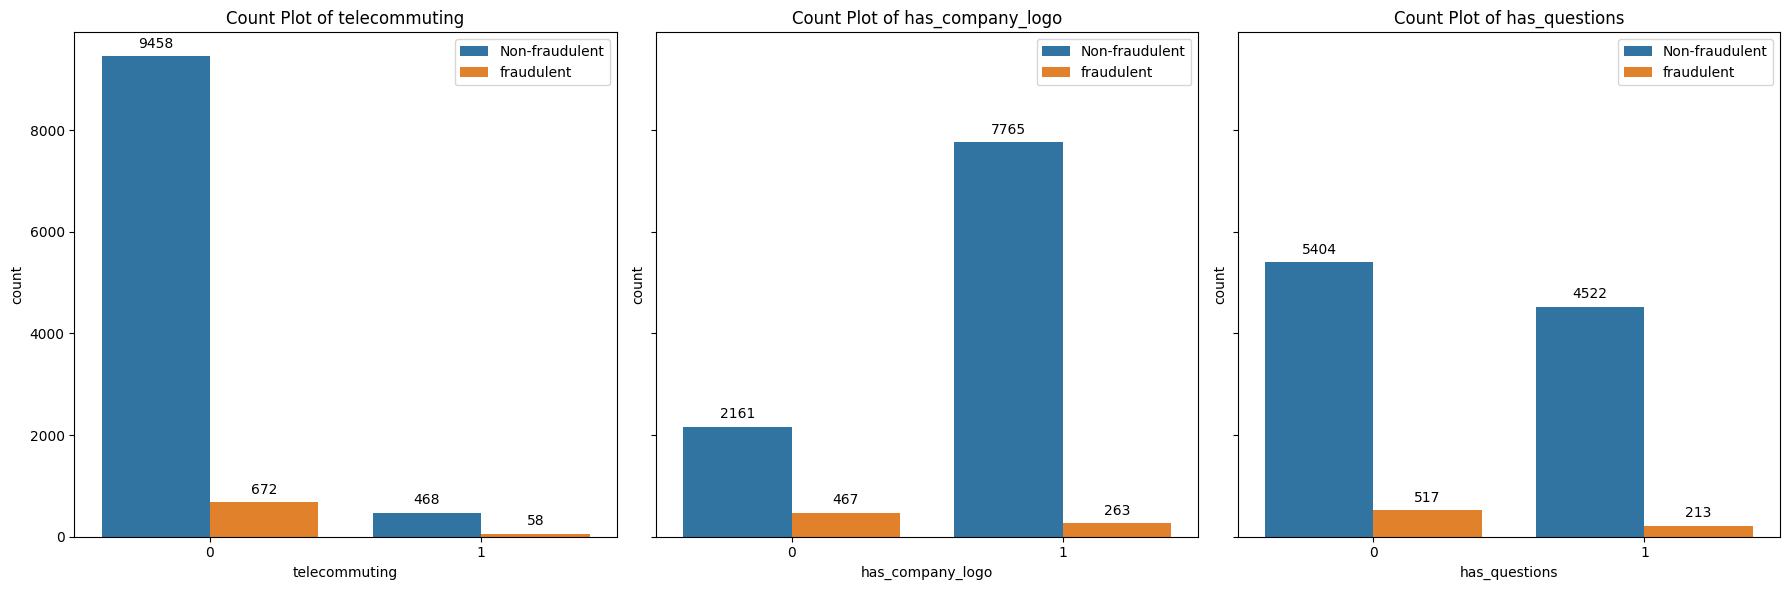

In [27]:
#Create a count plot for each feature,
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns
plot = 0
for fea in num_fea:
  ax = sns.countplot(x=fea, data=job_postings_data_US, hue='fraudulent', ax=axes[plot])
  # Display count values on top of the bars
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  textcoords = 'offset points')

  axes[plot].set_title("Count Plot of {}".format(fea))
  axes[plot].set_xlabel(fea)
  axes[plot].legend(labels=['Non-fraudulent', 'fraudulent'])
  plot += 1
plt.tight_layout()
plt.show()

There are some interesting insights from the count plots. Looking at each feature:


1.   For 'telecommuting" feature:


*   58/(58+468)*100 = 11.03% of job postings that provide telecommuting are actually fraudulent, while only
*   672/(672+9458)*100 = 6.63% of job postings that do not provide telecommuting are actually fraudulent

A job posting that provides telecommuting has nearly double the chance of being fraudulent.

2.   For 'has_company_logo' feature:


*   Only 263/(263+7765)*100 = 3.28% of job postings that have company logo are fraudulent, while up to
*   467/(467+2161)*100 = 17.78% of job postings that do not have a company logo are fraudulent.

A job posting that does not have a company logo is 6-time more likely to be fraudulent.
3. For 'has_question' feature:


*   517/(517+5404)*100 = 8.73% of job postings that have no asked questions are fraudulent, while only
*   213/(213+4522)*100 = 4.49% of job postings that have questions asked are fraudulent.
A job posting that has no asked question is twice more likely to be fraudulent.

These three features provide a good rule of thumb for predicting fraudulent job postings. A job that provides telecommuting, has no company logo, and does not has any questions asked is clearly a red flag.




###b. Exploring Categorical Features

Let have a look at the number of unique values for each categorical feature.

In [28]:
for fea in cat_fea:
  print('There are {}'.format(job_postings_data_US[fea].nunique()), 'unique values for a total of {}'.format(len(job_postings_data_US[fea])), 'values in {}'.format(fea), 'feature\n')

There are 6294 unique values for a total of 10656 values in title feature

There are 1744 unique values for a total of 10656 values in location feature

There are 697 unique values for a total of 10656 values in department feature

There are 534 unique values for a total of 10656 values in salary_range feature

There are 886 unique values for a total of 10656 values in company_profile feature

There are 8260 unique values for a total of 10656 values in description feature

There are 6486 unique values for a total of 10656 values in requirements feature

There are 3078 unique values for a total of 10656 values in benefits feature

There are 6 unique values for a total of 10656 values in employment_type feature

There are 7 unique values for a total of 10656 values in required_experience feature

There are 13 unique values for a total of 10656 values in required_education feature

There are 125 unique values for a total of 10656 values in industry feature

There are 38 unique values for 

Looking at the number of unique values of each features, we can see that some of the features can be considered as categorical, such as **['employment_type', 'required_experience', 'required_education', 'function']**. Some features with many unique values are actually text data. We should explore those features in a different way. Those features includes **['company_profile', 'description', 'requirements', 'benefits']**. Other features such as **['title', 'location', 'department', 'salary_range', 'industry']** have many unique values due to inconsistency in data entry, and can be grouped in to fewer categories.



#### Recategorizing categorical features

Some features such as ['title', 'location', 'department', 'salary_range', 'industry'] have various unique values due to data entry inconsistency. Thus, we will recategorize them in fewer categories.

In [29]:
#import and download required packages for text data procesing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [30]:
#Let remove non-letter character and tranform all the letters to lower case
job_postings_data_US['title'] = job_postings_data_US['title'].str.replace('[^a-zA-Z]',' ')
job_postings_data_US['title'] = job_postings_data_US['title'].str.lower()

job_postings_data_US['location'] = job_postings_data_US['location'].str.lower()

job_postings_data_US['department'] = job_postings_data_US['department'].str.replace('[^a-zA-Z]',' ')
job_postings_data_US['department'] = job_postings_data_US['department'].str.lower()

job_postings_data_US['salary_range'] = job_postings_data_US['salary_range'].str.lower()

job_postings_data_US['industry'] = job_postings_data_US['industry'].str.replace('[^a-zA-Z]',' ')
job_postings_data_US['industry'] = job_postings_data_US['industry'].str.lower()

In [31]:
from tkinter.constants import X
# Text vectorization
vectorizer = TfidfVectorizer()
X_1 = vectorizer.fit_transform(job_postings_data_US['title'])
X_2 = vectorizer.fit_transform(job_postings_data_US['location'])
X_3 = vectorizer.fit_transform(job_postings_data_US['department'])
X_4 = vectorizer.fit_transform(job_postings_data_US['salary_range'])
X_5 = vectorizer.fit_transform(job_postings_data_US['industry'])

# K-Means clustering
num_clusters = 10
kmeans1 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans2 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans3 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans4 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans5 = KMeans(n_clusters=num_clusters, random_state=42)

kmeans1.fit(X_1)
kmeans2.fit(X_2)
kmeans3.fit(X_3)
kmeans4.fit(X_4)
kmeans5.fit(X_5)

# Add cluster labels to DataFrame
job_postings_data_US['title_cluster'] = kmeans1.labels_
job_postings_data_US['location_cluster'] = kmeans2.labels_
job_postings_data_US['department_cluster'] = kmeans3.labels_
job_postings_data_US['salary_range_cluster'] = kmeans4.labels_
job_postings_data_US['industry_cluster'] = kmeans5.labels_

In [32]:
# Print title clusters
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print(job_postings_data_US[job_postings_data_US['title_cluster'] == cluster_id]['title'])
    print()

Cluster 0:
21                  english teacher abroad
22       graduates  english teacher abroad
25                  english teacher abroad
26                  english teacher abroad
32                  english teacher abroad
                       ...                
9010                english teacher abroad
9076                english teacher abroad
9097                english teacher abroad
10220               english teacher abroad
10274    graduates  english teacher abroad
Name: title, Length: 670, dtype: object

Cluster 1:
0                                         marketing intern
1                  commissioning machinery assistant  cma 
4                                         accounting clerk
5                            lead guest service specialist
6                                               hp bsm sme
                               ...                        
10649                    senior financial analyst  retail 
10650                                   water truck

In [33]:
grouped_title_dict = {0:'english teacher abroad',
                 1: 'other',
                 2: 'engineer',
                 3: 'account manager',
                 4: 'administrator',
                 5: 'customer service',
                 6: 'manager',
                 7: 'sale representative',
                 8: 'developer',
                 9: 'assistant'}
job_postings_data_US['grouped_title'] = job_postings_data_US['title_cluster'].map(grouped_title_dict)

In [34]:
# Print location clusters
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print(job_postings_data_US[job_postings_data_US['location_cluster'] == cluster_id]['location'])
    print()

Cluster 0:
8             us, nj, jersey city
34            us, nv, carson city
42              us, ia, iowa city
107            us, nj, piscataway
116            us, sd, rapid city
                   ...           
10443           us, nj, stratford
10475            us, az, sun city
10541         us, mo, kansas city
10630    us, nj, berkeley heights
10638              us, nj, newark
Name: location, Length: 351, dtype: object

Cluster 1:
5        us, ca, san francisco
20           us, ca, san ramon
41       us, ca, san francisco
57       us, ca, san francisco
65       us, ca, san francisco
                 ...          
10561                  us, ca,
10626    us, ca, san francisco
10636    us, ca, san francisco
10640    us, ca, san francisco
10651    us, ca, san francisco
Name: location, Length: 859, dtype: object

Cluster 2:
2        us, dc, washington
154      us, dc, washington
189      us, dc, washington
232      us, dc, washington
286      us, dc, washington
                ...     

In [35]:
grouped_location_dict = {0:'los angeles',
                 1: 'new york',
                 2: 'san francisco',
                 3: 'other',
                 4: 'texas',
                 5: 'las vegas',
                 6: 'san diego',
                 7: 'ohio',
                 8: 'albany',
                 9: 'florida'}
job_postings_data_US['grouped_location'] = job_postings_data_US['location_cluster'].map(grouped_location_dict)

In [36]:
# Print department clusters
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print(job_postings_data_US[job_postings_data_US['department_cluster'] == cluster_id]['department'])
    print()

Cluster 0:
1        not specified
3        not specified
4        not specified
5        not specified
6        not specified
             ...      
10649    not specified
10650    not specified
10652    not specified
10653    not specified
10655    not specified
Name: department, Length: 7618, dtype: object

Cluster 1:
2        sales
79       sales
88       sales
102      sales
180      sales
         ...  
10495    sales
10535    sales
10547    sales
10607    sales
10626    sales
Name: department, Length: 347, dtype: object

Cluster 2:
263      engineering
365      engineering
367      engineering
374      engineering
386      engineering
            ...     
10309    engineering
10345    engineering
10354    engineering
10502    engineering
10640    engineering
Name: department, Length: 250, dtype: object

Cluster 3:
0                           marketing
63                          marketing
66                          marketing
163                         marketing
213             

In [37]:
grouped_department_dict = {0:'not specified',
                 1: 'sales',
                 2: 'engineering',
                 3: 'marketing',
                 4: 'other',
                 5: 'operation',
                 6: 'technology',
                 7: 'it',
                 8: 'product',
                 9: 'customer service'}
job_postings_data_US['grouped_department'] = job_postings_data_US['department_cluster'].map(grouped_department_dict)

In [38]:
# Print salary_range clusters
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print(job_postings_data_US[job_postings_data_US['salary_range_cluster'] == cluster_id]['salary_range'])
    print()

Cluster 0:
0        not specified
1        not specified
2        not specified
3        not specified
4        not specified
             ...      
10650    not specified
10651    not specified
10652    not specified
10654    not specified
10655    not specified
Name: salary_range, Length: 9099, dtype: object

Cluster 1:
347      25000-42000
396      25000-30000
553      25000-35000
557      25000-30000
885      25000-50000
1019     25000-35000
1224     25000-30000
1672     25000-35000
1750    25000-100000
2120     25000-30000
3191     25000-40000
3872     25000-35000
3901     25000-35000
4459     25000-40000
4538     25000-30000
5128     25000-35000
5583     25000-30000
5620     25000-30000
5785     25000-30000
5796     25000-45000
5918     25000-30000
6348     25000-25000
6494     25000-30000
6682     25000-30000
6691     20000-25000
6799     25000-40000
6810     25000-32000
6862     25000-30000
7158     25000-35000
7324     25000-30000
7669     25000-30000
8177     25000-35000
8684

In [39]:
# Print industry clusters
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print(job_postings_data_US[job_postings_data_US['industry_cluster'] == cluster_id]['industry'])
    print()

Cluster 0:
63       marketing and advertising
87       marketing and advertising
103      marketing and advertising
122      marketing and advertising
176      marketing and advertising
                   ...            
10560    marketing and advertising
10561    marketing and advertising
10568    marketing and advertising
10595    marketing and advertising
10634    marketing and advertising
Name: industry, Length: 443, dtype: object

Cluster 1:
0        not specified
1        not specified
4        not specified
5        not specified
11       not specified
             ...      
10639    not specified
10640    not specified
10645    not specified
10647    not specified
10655    not specified
Name: industry, Length: 2682, dtype: object

Cluster 2:
2        computer software
17       computer software
18       computer software
27       computer software
29       computer software
               ...        
10362    computer software
10368    computer software
10636    computer softwa

In [40]:
grouped_industry_dict = {0:'marketing and advertising',
                 1: 'computer software',
                 2: 'engineer',
                 3: 'financial service',
                 4: 'internet',
                 5: 'other',
                 6: 'management',
                 7: 'information technology and service',
                 8: 'oil and energy',
                 9: 'real estate'}
job_postings_data_US['grouped_industry'] = job_postings_data_US['industry_cluster'].map(grouped_industry_dict)

Note: The salary_range is difficult to cluster in to group. Thus, we ignore that feature in the recategorizing process.

#####Create count plot for each categorical feature

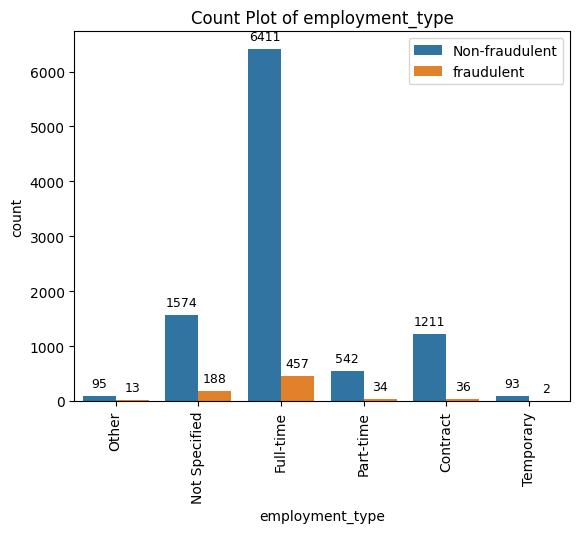

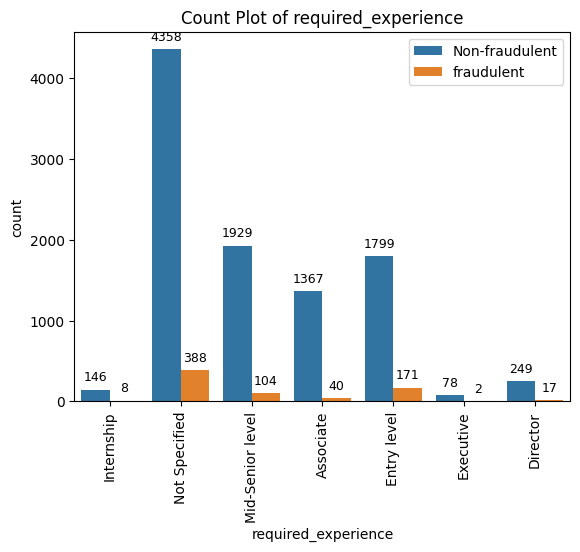

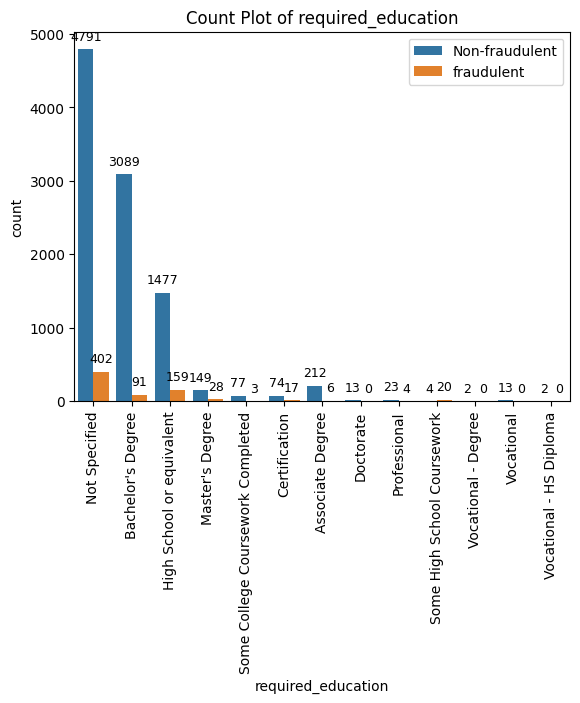

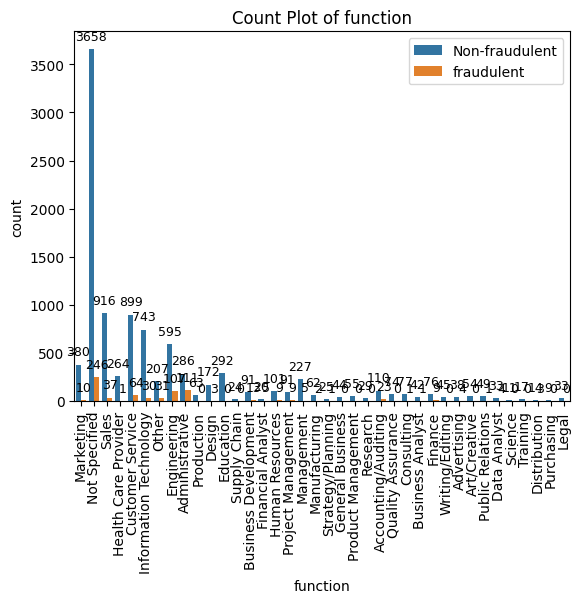

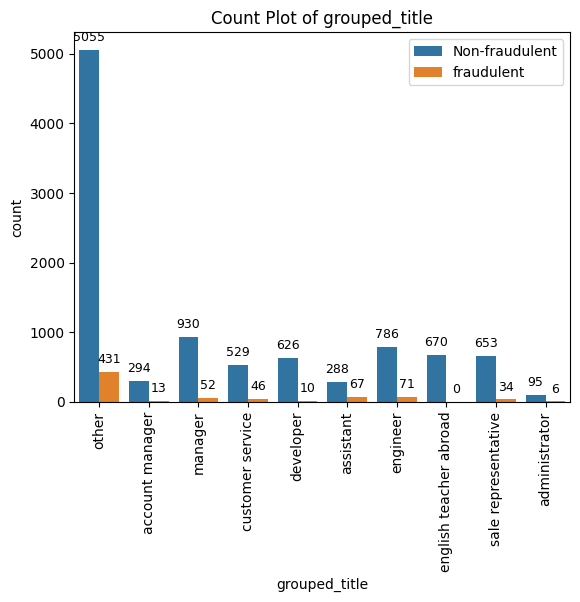

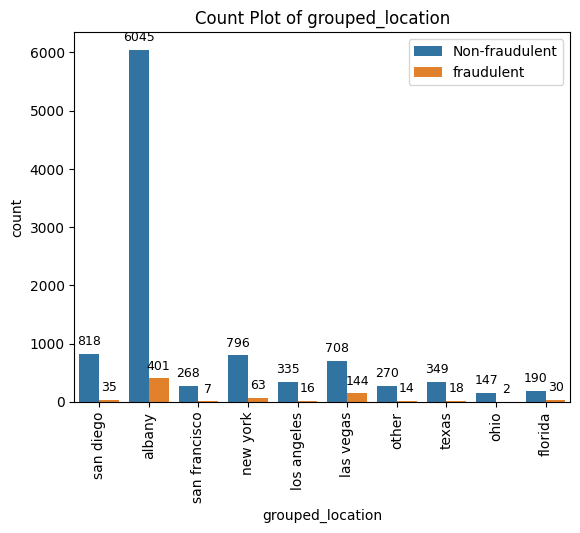

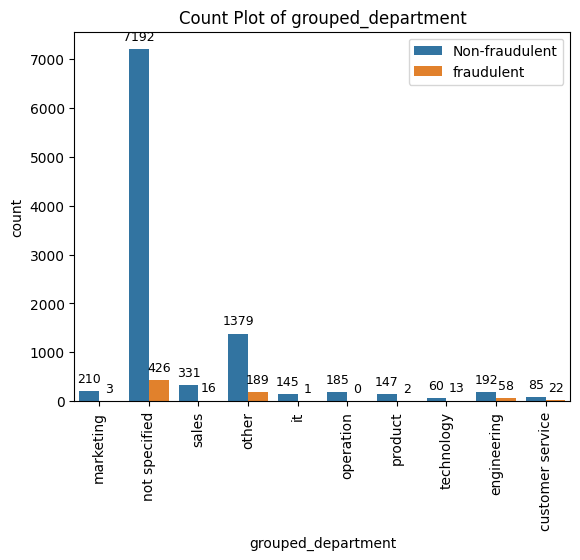

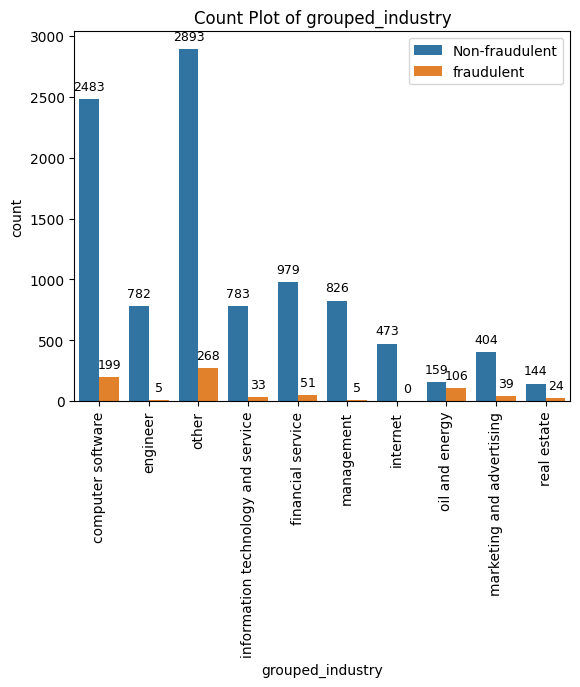

In [42]:
#Let sub-group the categorical features
cat_fea_2 = ['employment_type', 'required_experience', 'required_education', 'function',
    'grouped_title', 'grouped_location', 'grouped_department', 'grouped_industry']

#Make count plot for each categorical features with fraudulent as hue
for fea in cat_fea_2:
  ax = sns.countplot(x=fea, data=job_postings_data_US, hue='fraudulent')
  # Display count values on top of the bars
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  fontsize = 9,
                  textcoords = 'offset points')

  plt.title("Count Plot of {}".format(fea))
  plt.xlabel(fea)
  plt.xticks(rotation=90)
  plt.legend(labels=['Non-fraudulent', 'fraudulent'])
  plt.show()

#####Percentage of frauduent job postings in each category

In [57]:
#For each feature, calculate the percentage of frauduent job postings in each category
#Calculate the percentage of fraudulent postings for each feature
#Print out the result in descending order of the percentage of fraudulent postings
for fea in cat_fea_2:
  fraud_percentage = job_postings_data_US.groupby([fea])['fraudulent'].agg(['mean', 'count']).reset_index()

  # Rename columns for clarity
  fraud_percentage.rename(columns={'mean': 'fraud_percentage', 'count': 'total_count'}, inplace=True)

  # Calculate the percentage
  fraud_percentage['fraud_percentage'] = np.round(fraud_percentage['fraud_percentage'] * 100,2)

  # Print the result
  print(fraud_percentage.sort_values(by='fraud_percentage', ascending=False))

  employment_type  fraud_percentage  total_count
3           Other             12.04          108
2   Not Specified             10.67         1762
1       Full-time              6.65         6868
4       Part-time              5.90          576
0        Contract              2.89         1247
5       Temporary              2.11           95
  required_experience  fraud_percentage  total_count
2         Entry level              8.68         1970
6       Not Specified              8.18         4746
1            Director              6.39          266
4          Internship              5.19          154
5    Mid-Senior level              5.12         2033
0           Associate              2.84         1407
3           Executive              2.50           80
                   required_education  fraud_percentage  total_count
9         Some High School Coursework             83.33           24
2                       Certification             18.68           91
5                     Mast

From the above result, there are some interesting findings:
1.

####Text features

#####Standardize text **features**

In [44]:
#Create a list of text features
text = ['company_profile', 'description', 'requirements', 'benefits']

In [45]:
#Let standardize the text features (lowercase and letter numeric characters only)
for fea in text:
  job_postings_data_US[fea] = job_postings_data_US[fea].str.lower()
  job_postings_data_US[fea] = job_postings_data_US[fea].str.replace('[^a-zA-Z0-9]',' ')
  print(job_postings_data_US[fea].head())

0    we re food52  and we ve created a groundbreaki...
1    valor services provides workforce solutions th...
2    our passion for improving quality of life thro...
3    spotsource solutions llc is a global human cap...
4                                        not specified
Name: company_profile, dtype: object
0    food52  a fast growing  james beard award winn...
1    our client  located in houston  is actively se...
2    the company  esri   environmental systems rese...
3    job title  itemization review managerlocation ...
4    job overviewapex is an environmental consultin...
Name: description, dtype: object
0    experience with content management systems a m...
1    implement pre commissioning and commissioning ...
2    education  bachelor s or master s in gis  busi...
3    qualifications rn license in the state of texa...
4                                        not specified
Name: requirements, dtype: object
0                                        not specified
1               

#####Count number of characters, words, and determine the average word length of the text features

In [46]:
#Create a character count column for each text feature
for fea in text:
  job_postings_data_US[fea+'_char_count'] = job_postings_data_US[fea].str.len()

#Create a word count column word count for each text feature
for fea in text:
  job_postings_data_US[fea+'_word_count'] = job_postings_data_US[fea].str.split().str.len()

#Create an average word length column avg_word_len for each text feature
for fea in text:
  #To avoid dividing by 0, we'll assign avg_word_len = 1 if either char_count = 0 or word_count = 0
  job_postings_data_US[fea+'_avg_word_len'] = np.where(job_postings_data_US[fea+'_word_count'] > 0,
                                                      job_postings_data_US[fea+'_char_count'] / job_postings_data_US[fea+'_word_count'],1)

#####Exploratory Statistics for character count, word count, and average word length

In [47]:
job_postings_data_US[['company_profile_char_count', 'description_char_count',
       'requirements_char_count', 'benefits_char_count']].describe()

company_profile_char_count  description_char_count  \
count                10656.000000            10656.000000   
mean                   581.102196             1281.590184   
std                    534.655352              955.105273   
min                     13.000000                6.000000   
25%                     53.000000              615.000000   
50%                    552.000000             1086.000000   
75%                    869.000000             1697.000000   
max                   4007.000000            14907.000000   

       requirements_char_count  benefits_char_count  
count             10656.000000         10656.000000  
mean                590.766798           185.825732  
std                 630.965207           306.228403  
min                   1.000000             1.000000  
25%                 130.000000            13.000000  
50%                 444.000000            19.000000  
75%                 815.250000           251.000000  
max                6209.000000          4429.000000

In [48]:
job_postings_data_US[['company_profile_word_count', 'description_word_count',
       'requirements_word_count', 'benefits_word_count']].describe()

company_profile_word_count  description_word_count  \
count                10656.000000            10656.000000   
mean                    89.115616              184.025150   
std                     83.776188              134.525973   
min                      2.000000                0.000000   
25%                      9.000000               91.000000   
50%                     83.000000              156.000000   
75%                    136.000000              245.000000   
max                    596.000000             2196.000000   

       requirements_word_count  benefits_word_count  
count             10656.000000         10656.000000  
mean                 82.039696            27.735642  
std                  88.789382            46.909500  
min                   0.000000             0.000000  
25%                  17.000000             2.000000  
50%                  62.000000             3.000000  
75%                 113.000000            37.000000  
max                 886.000000           723.000000

In [49]:
job_postings_data_US[['company_profile_avg_word_len', 'description_avg_word_len',
       'requirements_avg_word_len', 'benefits_avg_word_len']].describe()

company_profile_avg_word_len  description_avg_word_len  \
count                  10656.000000              10656.000000   
mean                       6.678409                  7.092085   
std                        1.958120                  2.099177   
min                        4.860335                  1.000000   
25%                        6.146853                  6.420290   
50%                        6.500000                  6.914429   
75%                        6.708861                  7.438647   
max                       35.000000                110.555556   

       requirements_avg_word_len  benefits_avg_word_len  
count               10656.000000           10656.000000  
mean                    7.179527               6.796511  
std                     0.964200               1.233139  
min                     1.000000               1.000000  
25%                     6.500000               6.500000  
50%                     7.105606               6.500000  
75%                     7.666667               6.800000  
max                    29.800000              35.000000

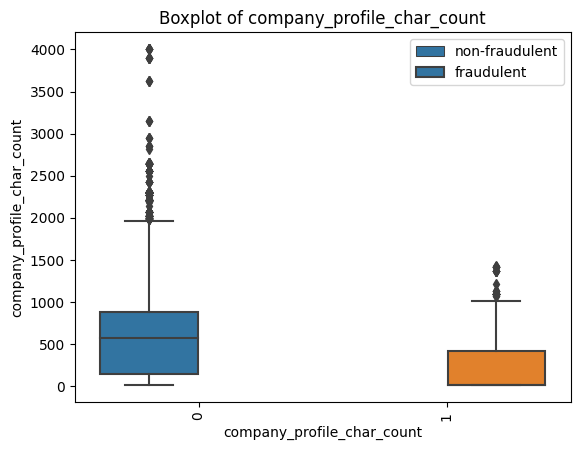

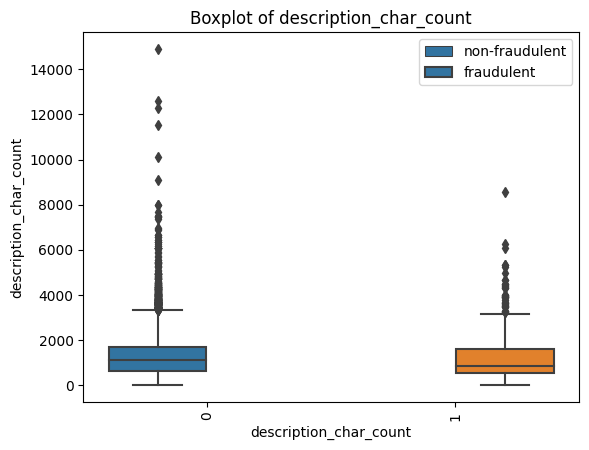

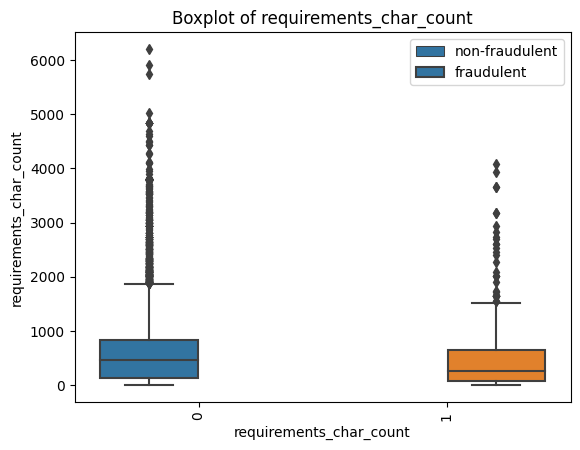

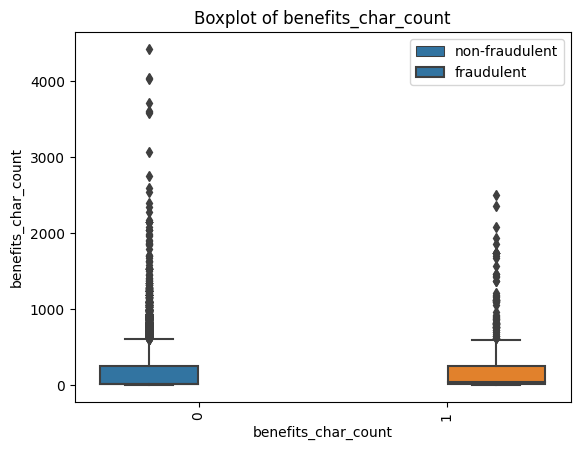

In [51]:
#For each text feature, calculate the mean and standard deviation of character count for fraudulent and non-fraudulent job postings
#Create a histogram to compare
for fea in text:
  sns.boxplot(job_postings_data_US, x='fraudulent', y=fea+'_char_count', hue='fraudulent')
  plt.title("Boxplot of {}".format(fea+'_char_count'))
  plt.xlabel(fea+'_char_count')
  plt.xticks(rotation=90)
  plt.legend(labels=['non-fraudulent', 'fraudulent'])
  plt.show()

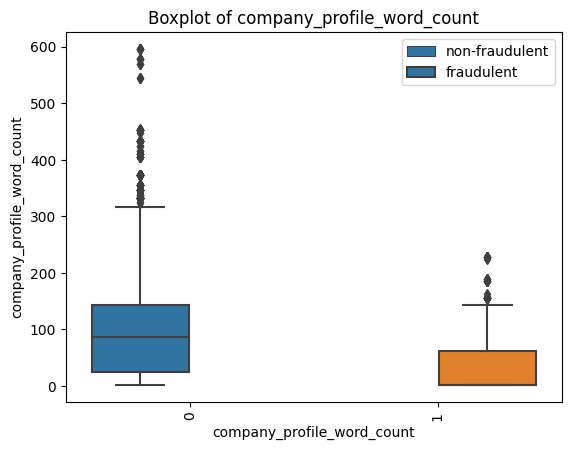

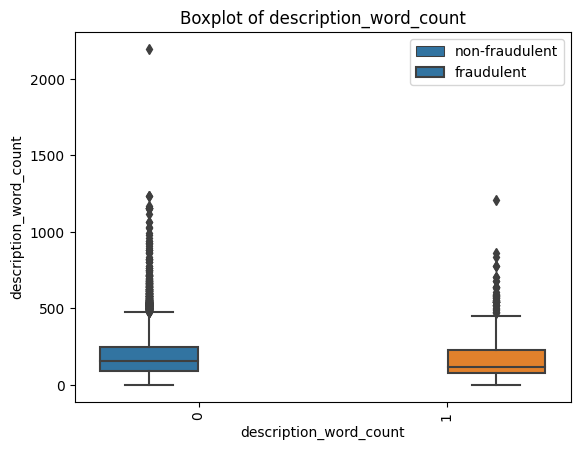

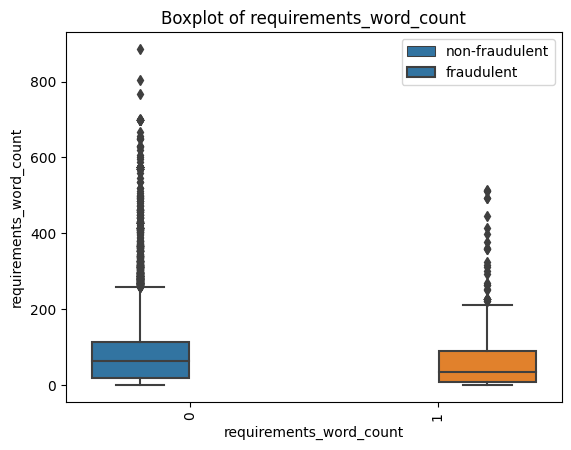

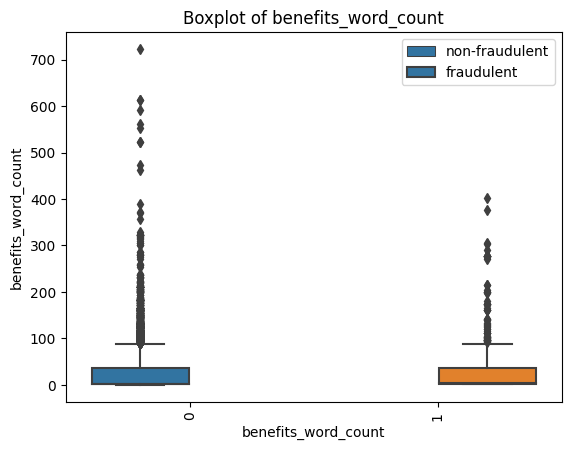

In [52]:
#For each text feature, calculate the mean and standard deviation of word count for fraudulent and non-fraudulent job postings
#Create a histogram to compare
for fea in text:
  sns.boxplot(job_postings_data_US, x='fraudulent', y=fea+'_word_count', hue='fraudulent')
  plt.title("Boxplot of {}".format(fea+'_word_count'))
  plt.xlabel(fea+'_word_count')
  plt.xticks(rotation=90)
  plt.legend(labels=['non-fraudulent', 'fraudulent'])
  plt.show()

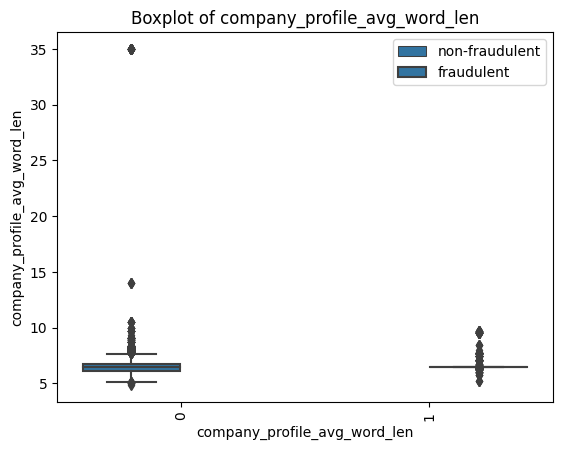

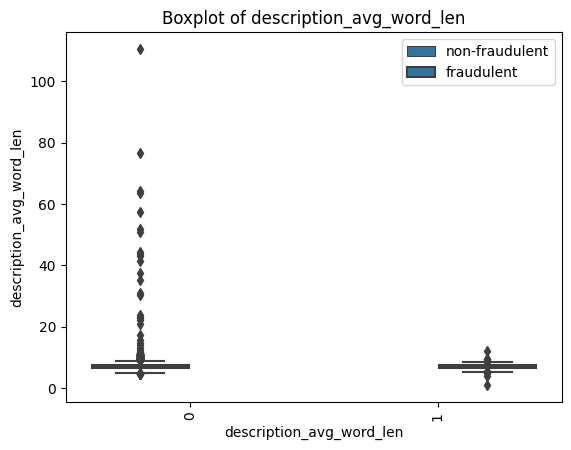

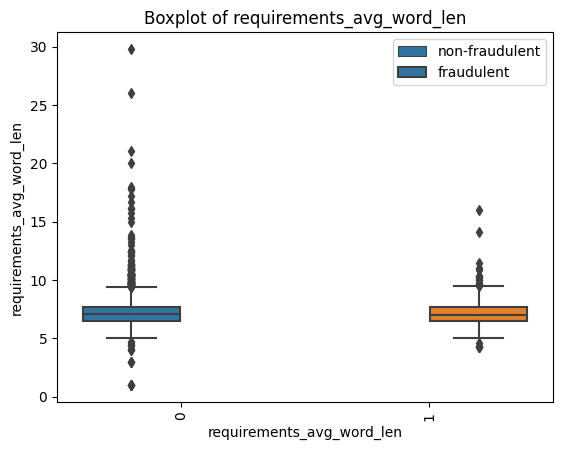

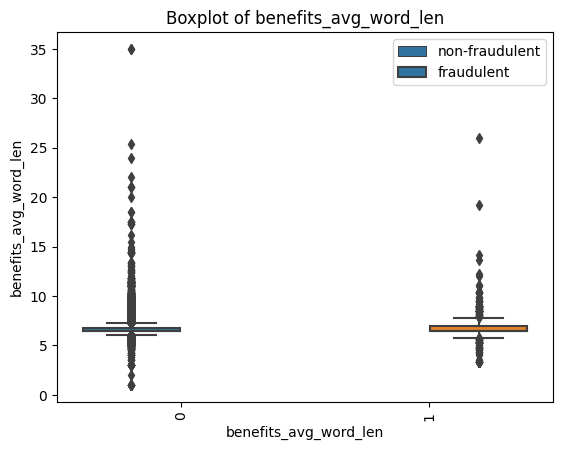

In [53]:
#For each text feature, calculate the mean and standard deviation of average word length count for fraudulent and non-fraudulent job postings
#Create a histogram to compare
for fea in text:
  sns.boxplot(job_postings_data_US, x='fraudulent', y=fea+'_avg_word_len', hue='fraudulent')
  plt.title("Boxplot of {}".format(fea+'_avg_word_len'))
  plt.xlabel(fea+'_avg_word_len')
  plt.xticks(rotation=90)
  plt.legend(labels=['non-fraudulent', 'fraudulent'])
  plt.show()

In [54]:
# Function to remove stopwords
#stop_words = set(stopwords.words('english'))
#def remove_stopwords(text):
#    tokens = text.split()  # Split the text into tokens
#    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
#    return ' '.join(tokens)  # Join the remaining tokens back into a string

# Apply the function to the DataFrame
#for fea in text:
#  job_postings_data_US[fea] = job_postings_data_US[fea].apply(remove_stopwords)

In [55]:
#profile = ProfileReport(job_postings_data_US[text], title="Text Features Profiling Report")
#profile.to_notebook_iframe()